In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("netflix_dataset_50.csv")

In [3]:
df.head(2)

,title,genre,release_year,rating,content_type,views,watch_time,country,region,genre_encoded
0,Title_1,Horror,2016,8.1,Movie,318824,157,India,Europe,3
1,Title_2,Romance,2024,6.5,Series,258426,68,USA,Europe,4


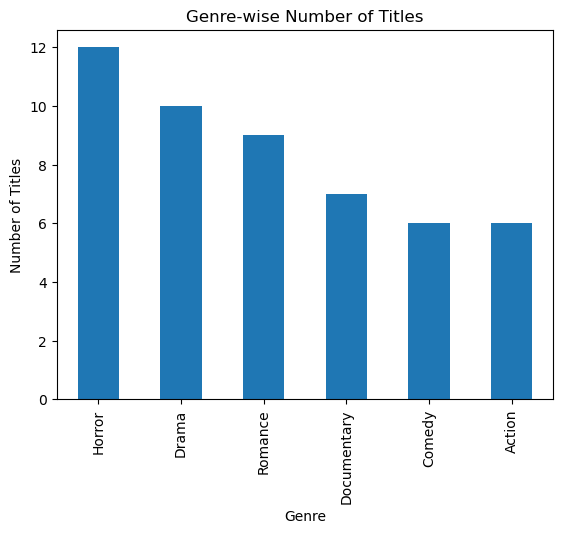

In [34]:
genre_counts = df['genre'].value_counts()

genre_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.title('Genre-wise Number of Titles')
# plt.savefig("Genre_plots1.png", dpi=300, bbox_inches='tight')
plt.show()

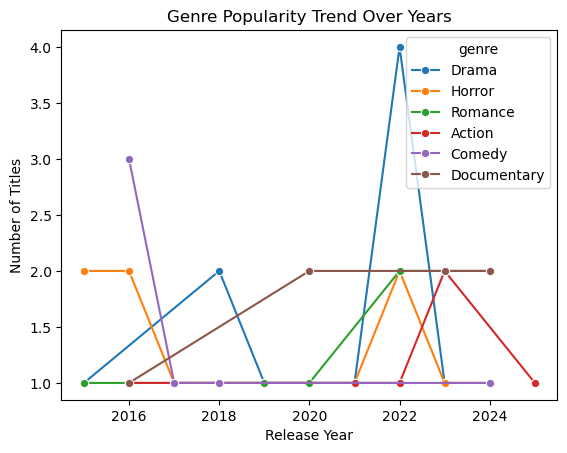

In [35]:
genre_count = df.groupby(['release_year', 'genre']).size().reset_index(name='count')

sns.lineplot(data=genre_count, x='release_year', y='count', hue='genre', marker='o')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Genre Popularity Trend Over Years')
# plt.savefig("Genre_plots2.png", dpi=300, bbox_inches='tight')
plt.show()


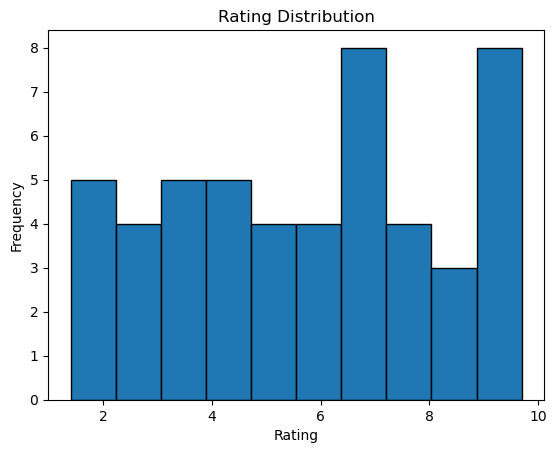

In [33]:
plt.hist(df['rating'], bins=10, edgecolor='black') 
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution')
# plt.savefig("Rating_plots1.png", dpi=300, bbox_inches='tight')
plt.show()

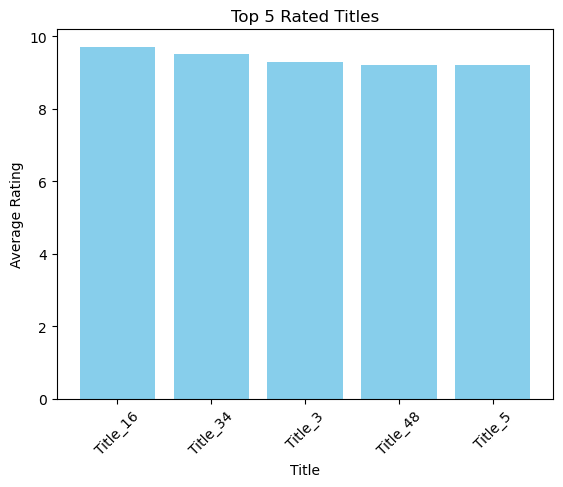

In [32]:
top_rated_title = df.groupby('title')['rating'].mean().nlargest(5)

# plt.figure(figsize=(10,6))
plt.bar(top_rated_title.index, top_rated_title.values, color='skyblue')
plt.xlabel("Title")
plt.ylabel("Average Rating")
plt.title("Top 5 Rated Titles")
plt.xticks(rotation=45)
# plt.savefig("Rating_plots2.png", dpi=300, bbox_inches='tight')
plt.show()


In [9]:
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')
df['month_name'] = df['release_year'].dt.month_name()

In [10]:
df.head(2)

,title,genre,release_year,rating,content_type,views,watch_time,country,region,genre_encoded,month_name
0,Title_1,Horror,2016-01-01,8.1,Movie,318824,157,India,Europe,3,January
1,Title_2,Romance,2024-01-01,6.5,Series,258426,68,USA,Europe,4,January


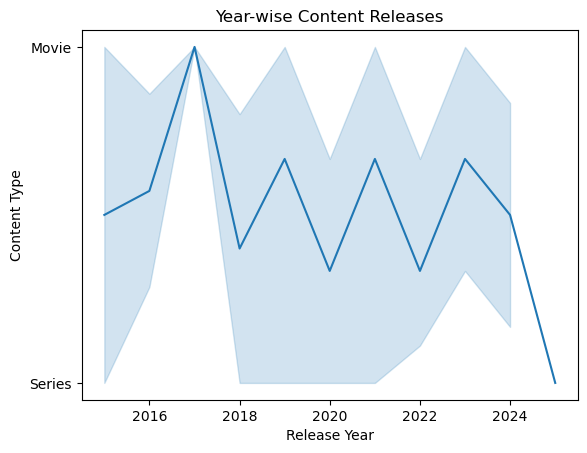

In [31]:
sns.lineplot(data=df, x='release_year', y='content_type')  

plt.xlabel('Release Year')      
plt.ylabel('Content Type')      
plt.title('Year-wise Content Releases')  
# plt.savefig("trends_plots1.png", dpi=300, bbox_inches='tight')
plt.show()

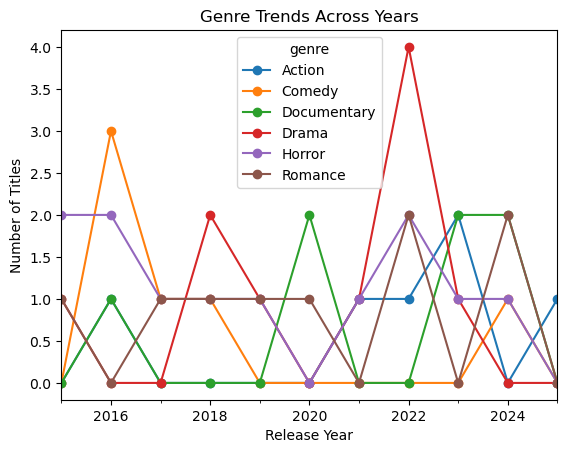

In [30]:
genre_trend_pivot = df.pivot_table(index='release_year', columns='genre', aggfunc='size', fill_value=0)

genre_trend_pivot.plot(kind='line', marker='o')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')   # corrected spelling
plt.title('Genre Trends Across Years')
# plt.savefig("trends_plots.png", dpi=300, bbox_inches='tight')
plt.show()


In [26]:
genre_trend_pivot = df.pivot_table(index='release_year', columns='genre', aggfunc='size', fill_value=0)
genre_trend_pivot

genre,Action,Comedy,Documentary,Drama,Horror,Romance
release_year,,,,,,
2015-01-01,0,0,0,1,2,1
2016-01-01,1,3,1,0,2,0
2017-01-01,0,1,0,0,1,1
2018-01-01,0,1,0,2,1,1
2019-01-01,0,0,0,1,1,1
2020-01-01,0,0,2,0,0,1
2021-01-01,1,0,0,1,1,0
2022-01-01,1,0,0,4,2,2
2023-01-01,2,0,2,1,1,0
